# 6.4: Supervised Machine Learning: Regression

### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
# Create file path
path = r'C:\Users\gre60\OneDrive\CareerFoundry Data Analytics Program\Data Immersion\Achievement 6\NFL Final Project 2'

In [6]:
# Import NFL Geo Spread Analysis
df = pd.read_csv(os.path.join(path, 'nfl_geo_spread_analysis.csv'))

In [7]:
# Preview the data
df.head()

,Unnamed: 0,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,...,home_name,away_market,away_name,home_division,away_division,home_full_name,away_full_name,home_location,home_city,home_state
0,0,1999_01_MIN_ATL,1999,REG,1,9/12/1999,Sunday,NaN,MIN,17.0,...,Falcons,Minnesota,Vikings,NFC South,NFC North,Atlanta Falcons,Minnesota Vikings,"Atlanta, GA",Atlanta,GA
1,1,1999_01_KC_CHI,1999,REG,1,9/12/1999,Sunday,NaN,KC,17.0,...,Bears,Kansas City,Chiefs,NFC North,AFC West,Chicago Bears,Kansas City Chiefs,"Chicago, IL",Chicago,IL
2,2,1999_01_PIT_CLE,1999,REG,1,9/12/1999,Sunday,NaN,PIT,43.0,...,Browns,Pittsburgh,Steelers,AFC North,AFC North,Cleveland Browns,Pittsburgh Steelers,"Cleveland, OH",Cleveland,OH
3,3,1999_01_OAK_GB,1999,REG,1,9/12/1999,Sunday,NaN,OAK,24.0,...,Packers,Oakland,Raiders,NFC North,AFC West,Green Bay Packers,Oakland Raiders,"Green Bay, WI",Green Bay,WI
4,4,1999_01_BUF_IND,1999,REG,1,9/12/1999,Sunday,NaN,BUF,14.0,...,Colts,Buffalo,Bills,AFC South,AFC East,Indianapolis Colts,Buffalo Bills,"Indianapolis, IN",Indianapolis,IN


In [8]:
# Unnamed: 0 column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df.shape

(6627, 37)

### Data Prep for Regression Analysis

In [11]:
# Create subset data to see how indoor teams play against outdoor teams
indoor_teams = ['Arizona Cardinals', 'Atlanta Falcons', 'Dallas Cowboys', 'Detroit Lions', 'Houston Texans', 'Indianapolis Colts', 
                'Las Vegas Raiders', 'Los Angeles Rams', 'Los Angeles Chargers', 'Minnesota Vikings', 'New Orleans Saints']

outdoors = df.loc[(df['stadium type'] == 'outdoors') & (df['away_full_name'].isin(indoor_teams))]

In [12]:
outdoors

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,...,home_name,away_market,away_name,home_division,away_division,home_full_name,away_full_name,home_location,home_city,home_state
8,1999_01_ARI_PHI,1999,REG,1,9/12/1999,Sunday,NaN,ARI,25.0,PHI,...,Eagles,Arizona,Cardinals,NFC East,NFC West,Philadelphia Eagles,Arizona Cardinals,"Philadelphia, PA",Philadelphia,PA
13,1999_01_DAL_WAS,1999,REG,1,9/12/1999,Sunday,NaN,DAL,41.0,WAS,...,Commanders,Dallas,Cowboys,NFC East,NFC East,Washington Commanders,Dallas Cowboys,"Landover, MD",Landover,MD
22,1999_02_ARI_MIA,1999,REG,2,9/19/1999,Sunday,NaN,ARI,16.0,MIA,...,Dolphins,Arizona,Cardinals,AFC East,NFC West,Miami Dolphins,Arizona Cardinals,"Miami, FL",Miami,FL
24,1999_02_IND_NE,1999,REG,2,9/19/1999,Sunday,NaN,IND,28.0,NE,...,Patriots,Indianapolis,Colts,AFC East,AFC South,New England Patriots,Indianapolis Colts,"Foxborough, MA",Foxborough,MA
27,1999_02_NO_SF,1999,REG,2,9/19/1999,Sunday,NaN,NO,21.0,SF,...,49ers,New Orleans,Saints,NFC West,NFC South,San Francisco 49ers,New Orleans Saints,"San Francisco, CA",San Francisco,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6596,2023_17_LAC_DEN,2023,REG,17,12/31/2023,Sunday,16:25,LAC,9.0,DEN,...,Broncos,Los Angeles,Chargers,AFC West,AFC West,Denver Broncos,Los Angeles Chargers,"Denver, CO",Denver,CO
6612,2023_18_LA_SF,2023,REG,18,1/7/2024,Sunday,16:25,LA,21.0,SF,...,49ers,Los Angeles,Rams,NFC West,NFC West,San Francisco 49ers,Los Angeles Rams,"San Francisco, CA",San Francisco,CA
6613,2023_18_DAL_WAS,2023,REG,18,1/7/2024,Sunday,16:25,DAL,38.0,WAS,...,Commanders,Dallas,Cowboys,NFC East,NFC East,Washington Commanders,Dallas Cowboys,"Landover, MD",Landover,MD
6621,2023_20_HOU_BAL,2023,DIV,20,1/20/2024,Saturday,16:30,HOU,10.0,BAL,...,Ravens,Houston,Texans,AFC North,AFC South,Baltimore Ravens,Houston Texans,"Baltimore, MD",Baltimore,MD


In [13]:
outdoors.isnull().sum()

game_id              0
season               0
game_type            0
week                 0
gameday              0
weekday              0
gametime            45
away_team            0
away_score           0
home_team            0
home_score           0
location             0
actual_spread        0
actual_total         0
overtime             0
away_rest            0
home_rest            0
projected_spread     0
projected_total      0
div_game             0
stadium type         0
surface             10
temp                35
wind                35
stadium_id           0
Stadium              0
home_market          0
home_name            0
away_market          0
away_name            0
home_division        0
away_division        0
home_full_name       0
away_full_name       0
home_location        0
home_city            0
home_state           0
dtype: int64

In [14]:
outdoors['temp'].mean()

58.18677042801556

In [15]:
# Replace missing temperature data with the mean
outdoors['temp'].fillna(outdoors['temp'].mean(), inplace=True)

C:\Users\gre60\AppData\Local\Temp\ipykernel_1216\2269214.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  outdoors['temp'].fillna(outdoors['temp'].mean(), inplace=True)
C:\Users\gre60\AppData\Local\Temp\ipykernel_1216\2269214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdoors['temp'].fillna(outdoors['temp'].mean(), inplace=True)


In [16]:
outdoors.isnull().sum()

game_id              0
season               0
game_type            0
week                 0
gameday              0
weekday              0
gametime            45
away_team            0
away_score           0
home_team            0
home_score           0
location             0
actual_spread        0
actual_total         0
overtime             0
away_rest            0
home_rest            0
projected_spread     0
projected_total      0
div_game             0
stadium type         0
surface             10
temp                 0
wind                35
stadium_id           0
Stadium              0
home_market          0
home_name            0
away_market          0
away_name            0
home_division        0
away_division        0
home_full_name       0
away_full_name       0
home_location        0
home_city            0
home_state           0
dtype: int64

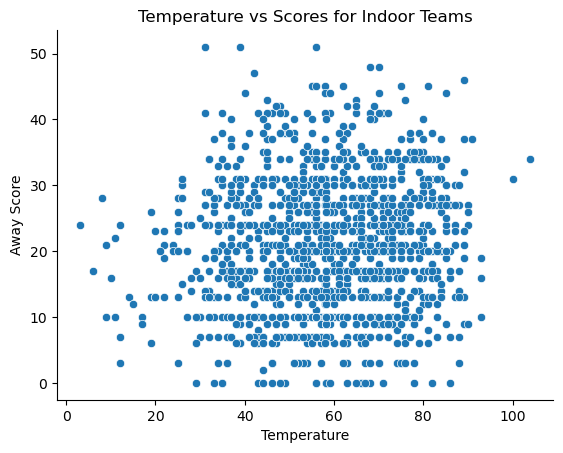

In [83]:
sns.scatterplot(x='temp', y='away_score', data=outdoors)
sns.despine()  # Remove the top and right spines
plt.title('Temperature vs Scores for Indoor Teams')
plt.xlabel('Temperature')
plt.ylabel('Away Score')
plt.savefig('indoor_vs_outdoor_scores.png')
plt.show()

In [18]:
outdoors['temp'].corr(outdoors['away_score'])

0.08999672400005901

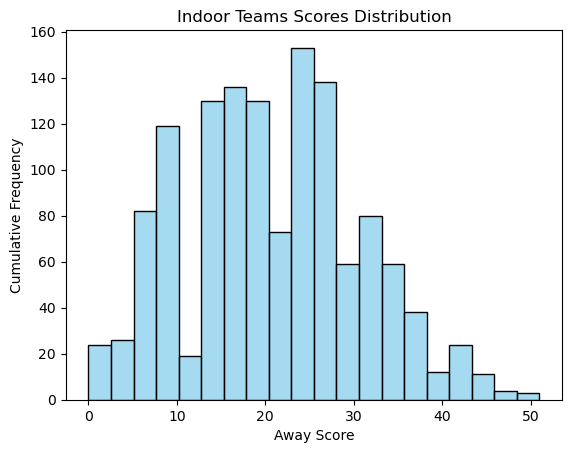

In [19]:
sns.histplot(data=outdoors, x='away_score', color='skyblue')
plt.title('Indoor Teams Scores Distribution')
plt.xlabel('Away Score')
plt.ylabel('Cumulative Frequency')
plt.show()

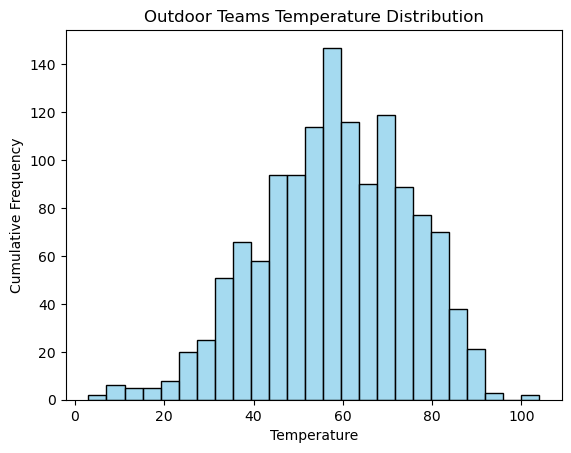

In [20]:
sns.histplot(data=outdoors, x='temp', color='skyblue')
plt.title('Outdoor Teams Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Cumulative Frequency')
plt.show()

### Hypothesis

##### If temperature is warmer, indoor teams will score points against outdoor teams.

In [23]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = outdoors['temp'].values.reshape(-1,1)
y = outdoors['away_score'].values.reshape(-1,1)

In [24]:
X

array([[75.],
       [71.],
       [82.],
       ...,
       [48.],
       [27.],
       [69.]])

In [25]:
y

array([[25.],
       [41.],
       [16.],
       ...,
       [38.],
       [10.],
       [31.]])

### Regression Analysis

In [27]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [29]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

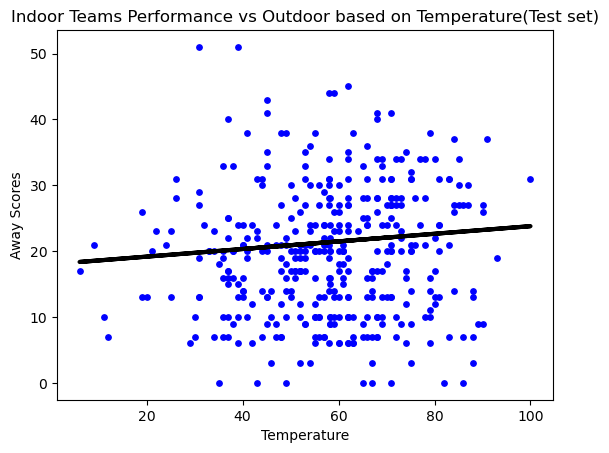

In [57]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='black', linewidth =3)
plot_test.title('Indoor Teams Performance vs Outdoor based on Temperature(Test set)')
plot_test.xlabel('Temperature')
plot_test.ylabel('Away Scores')
plot_test.savefig('indoor_vs_outdoor_performance_temperature.png')
plot_test.show()

In [59]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [61]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.05778933]]
Mean squared error:  97.78876384926484
R2 score:  -0.027843055220994506


#### Interpretation:

##### The slope is positive which aligns with the hypothesis of indoor teams scoring more if temperature increases. However, because the slope is barely positive; temperature is hardly a factor for indoor teams playing outside.

##### The MSE is 97.79 which indicates data points are not close to the regression line. This also means the model is not accurate.

##### The R2 score: -0.03 indicates a very weak fit.

In [67]:
y_predicted

array([[20.38276198],
       [21.94307376],
       [21.37597384],
       [22.00086308],
       [18.64908222],
       [19.68929008],
       [23.21443891],
       [22.80991364],
       [19.80486873],
       [21.24960186],
       [20.78728725],
       [22.05865241],
       [21.76970578],
       [20.03602603],
       [18.70687155],
       [21.13402321],
       [21.30739118],
       [21.48075916],
       [20.09381535],
       [20.90286591],
       [21.82749511],
       [22.98328161],
       [20.84507658],
       [21.53854848],
       [20.84507658],
       [22.23202039],
       [21.24960186],
       [22.80991364],
       [21.94307376],
       [21.07623388],
       [21.59633781],
       [21.94307376],
       [21.94307376],
       [21.36518051],
       [21.07623388],
       [21.53854848],
       [22.40538836],
       [19.7470794 ],
       [20.84507658],
       [20.61391928],
       [21.36518051],
       [21.59633781],
       [21.19181253],
       [21.59633781],
       [20.72949793],
       [20

In [69]:
# Create a dataframe comparing the actual and predicted values of y.
compare_data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
compare_data.head(20)

,Actual,Predicted
0,10.0,20.382762
1,28.0,21.943074
2,9.0,21.375974
3,17.0,22.000863
4,10.0,18.649082
5,6.0,19.689290
6,27.0,23.214439
7,31.0,22.809914
8,51.0,19.804869
9,10.0,21.249602


### Compare regression fit with training model

In [72]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [74]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [81]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.05778933]]
Mean squared error:  97.21403319110891
R2 score:  0.009225185837588246


##### The values are identical to the model. There is a positive relationship with an MSE of 97.21 and a weak R² of 0.0092, indicating the model is not overfitted. This suggests that temperature positively correlates with indoor team scores. However, other factors in the data may influence the outcomes of indoor team performances.